In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 39s 9us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

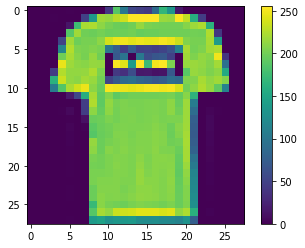

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.4980 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 1s 686us/step - loss: 0.3740 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.3365 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 1s 680us/step - loss: 0.3119 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 1s 727us/step - loss: 0.2928 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.2780 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.2633 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.2540 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.2434 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 1s 651u

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 593us/step - loss: 0.3263 - accuracy: 0.8857
Test accuracy: 0.885699987411499


In [18]:
predictions = model.predict(test_images)
print(predictions[0])

[1.8132516e-06 2.8390386e-07 1.0669463e-06 4.7578265e-08 9.6460035e-08
 1.8408212e-04 5.4119988e-07 2.1768956e-02 3.3458241e-07 9.7804272e-01]


In [15]:
np.argmax(predictions[0])

9

In [33]:
x=train_images[100]

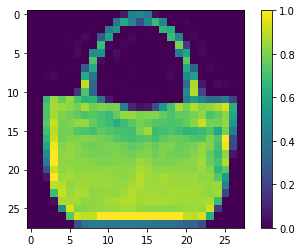

In [34]:
plt.figure()
plt.imshow(x)
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
class_names[np.argmax(model.predict(np.array([x])))]

'Bag'